# Cíl
Cílem tohoto cvičení je vytvoření vlastní neuronové sítě, která bude určovat, co vidí 4 pixelová kamera.
Jedná se o aplikaci, která byla představena v přednášce.

Na vstupu budou hodnoty 4 pixelů. 
- Hodnota -1 představuje zcela černou barvu
- Hodnota +1 představuje zcela bílou barvu
- Hodnoty mezi nimi poměrnou šedivou barvu

Pixely jsou sice zadány v řadě, ale geometricky jsou umístěny následovně.
- 1 2
- 3 4

Neuronová síť má vracet informaci, zda je pixely na obrázku představují
- jednolitou barvu (solid) - všechny pixely mají přibližně stejnou barvu
- svislé čáry (vertical) - jedna čára je bílá, druhá černá, v libovolném pořadí
- šikmé čáry (diagonal) - na obrázku jsou dvě diagonální čáry, jedna bílá, druhá černá
- vodorovné (horizontal) - na obrázku je jedna vodorovná bílá a druhá vodorovná černá čára

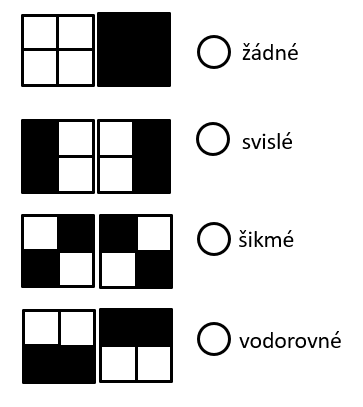

Do jednotlivých bloků doplňte potřebný zdrojový kód.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Activation
from keras.models import Sequential

# Načtení dat

In [3]:
# načtení dat z CSV
data = pd.read_csv ("..\dataset\camera.csv", sep=";", decimal=",")

# Popis dat
- Zobrazení vzorku dat
- Základní statistická charakteristika
- Distribuce hodnot

     pixel1    pixel2    pixel3    pixel4  solid  vertical  diagonal  \
0  0.242848  0.315426  0.225074  0.441009      1         0         0   
1  0.212298  0.985880  0.700295  0.262448      1         0         0   
2  0.259762  0.692340  0.393549  0.711056      1         0         0   
3  0.733063  0.977552  0.327758  0.213178      1         0         0   
4  0.251985  0.287715  0.693281  0.211018      1         0         0   

   horizontal  
0           0  
1           0  
2           0  
3           0  
4           0  
             pixel1        pixel2        pixel3        pixel4         solid  \
count  16000.000000  16000.000000  16000.000000  16000.000000  16000.000000   
mean      -0.004084     -0.004718     -0.004395      0.000736      0.250000   
std        0.647283      0.643478      0.641570      0.645820      0.433026   
min       -0.999931     -0.999932     -0.999923     -0.999865      0.000000   
25%       -0.614454     -0.608144     -0.604348     -0.604686      0.000000 

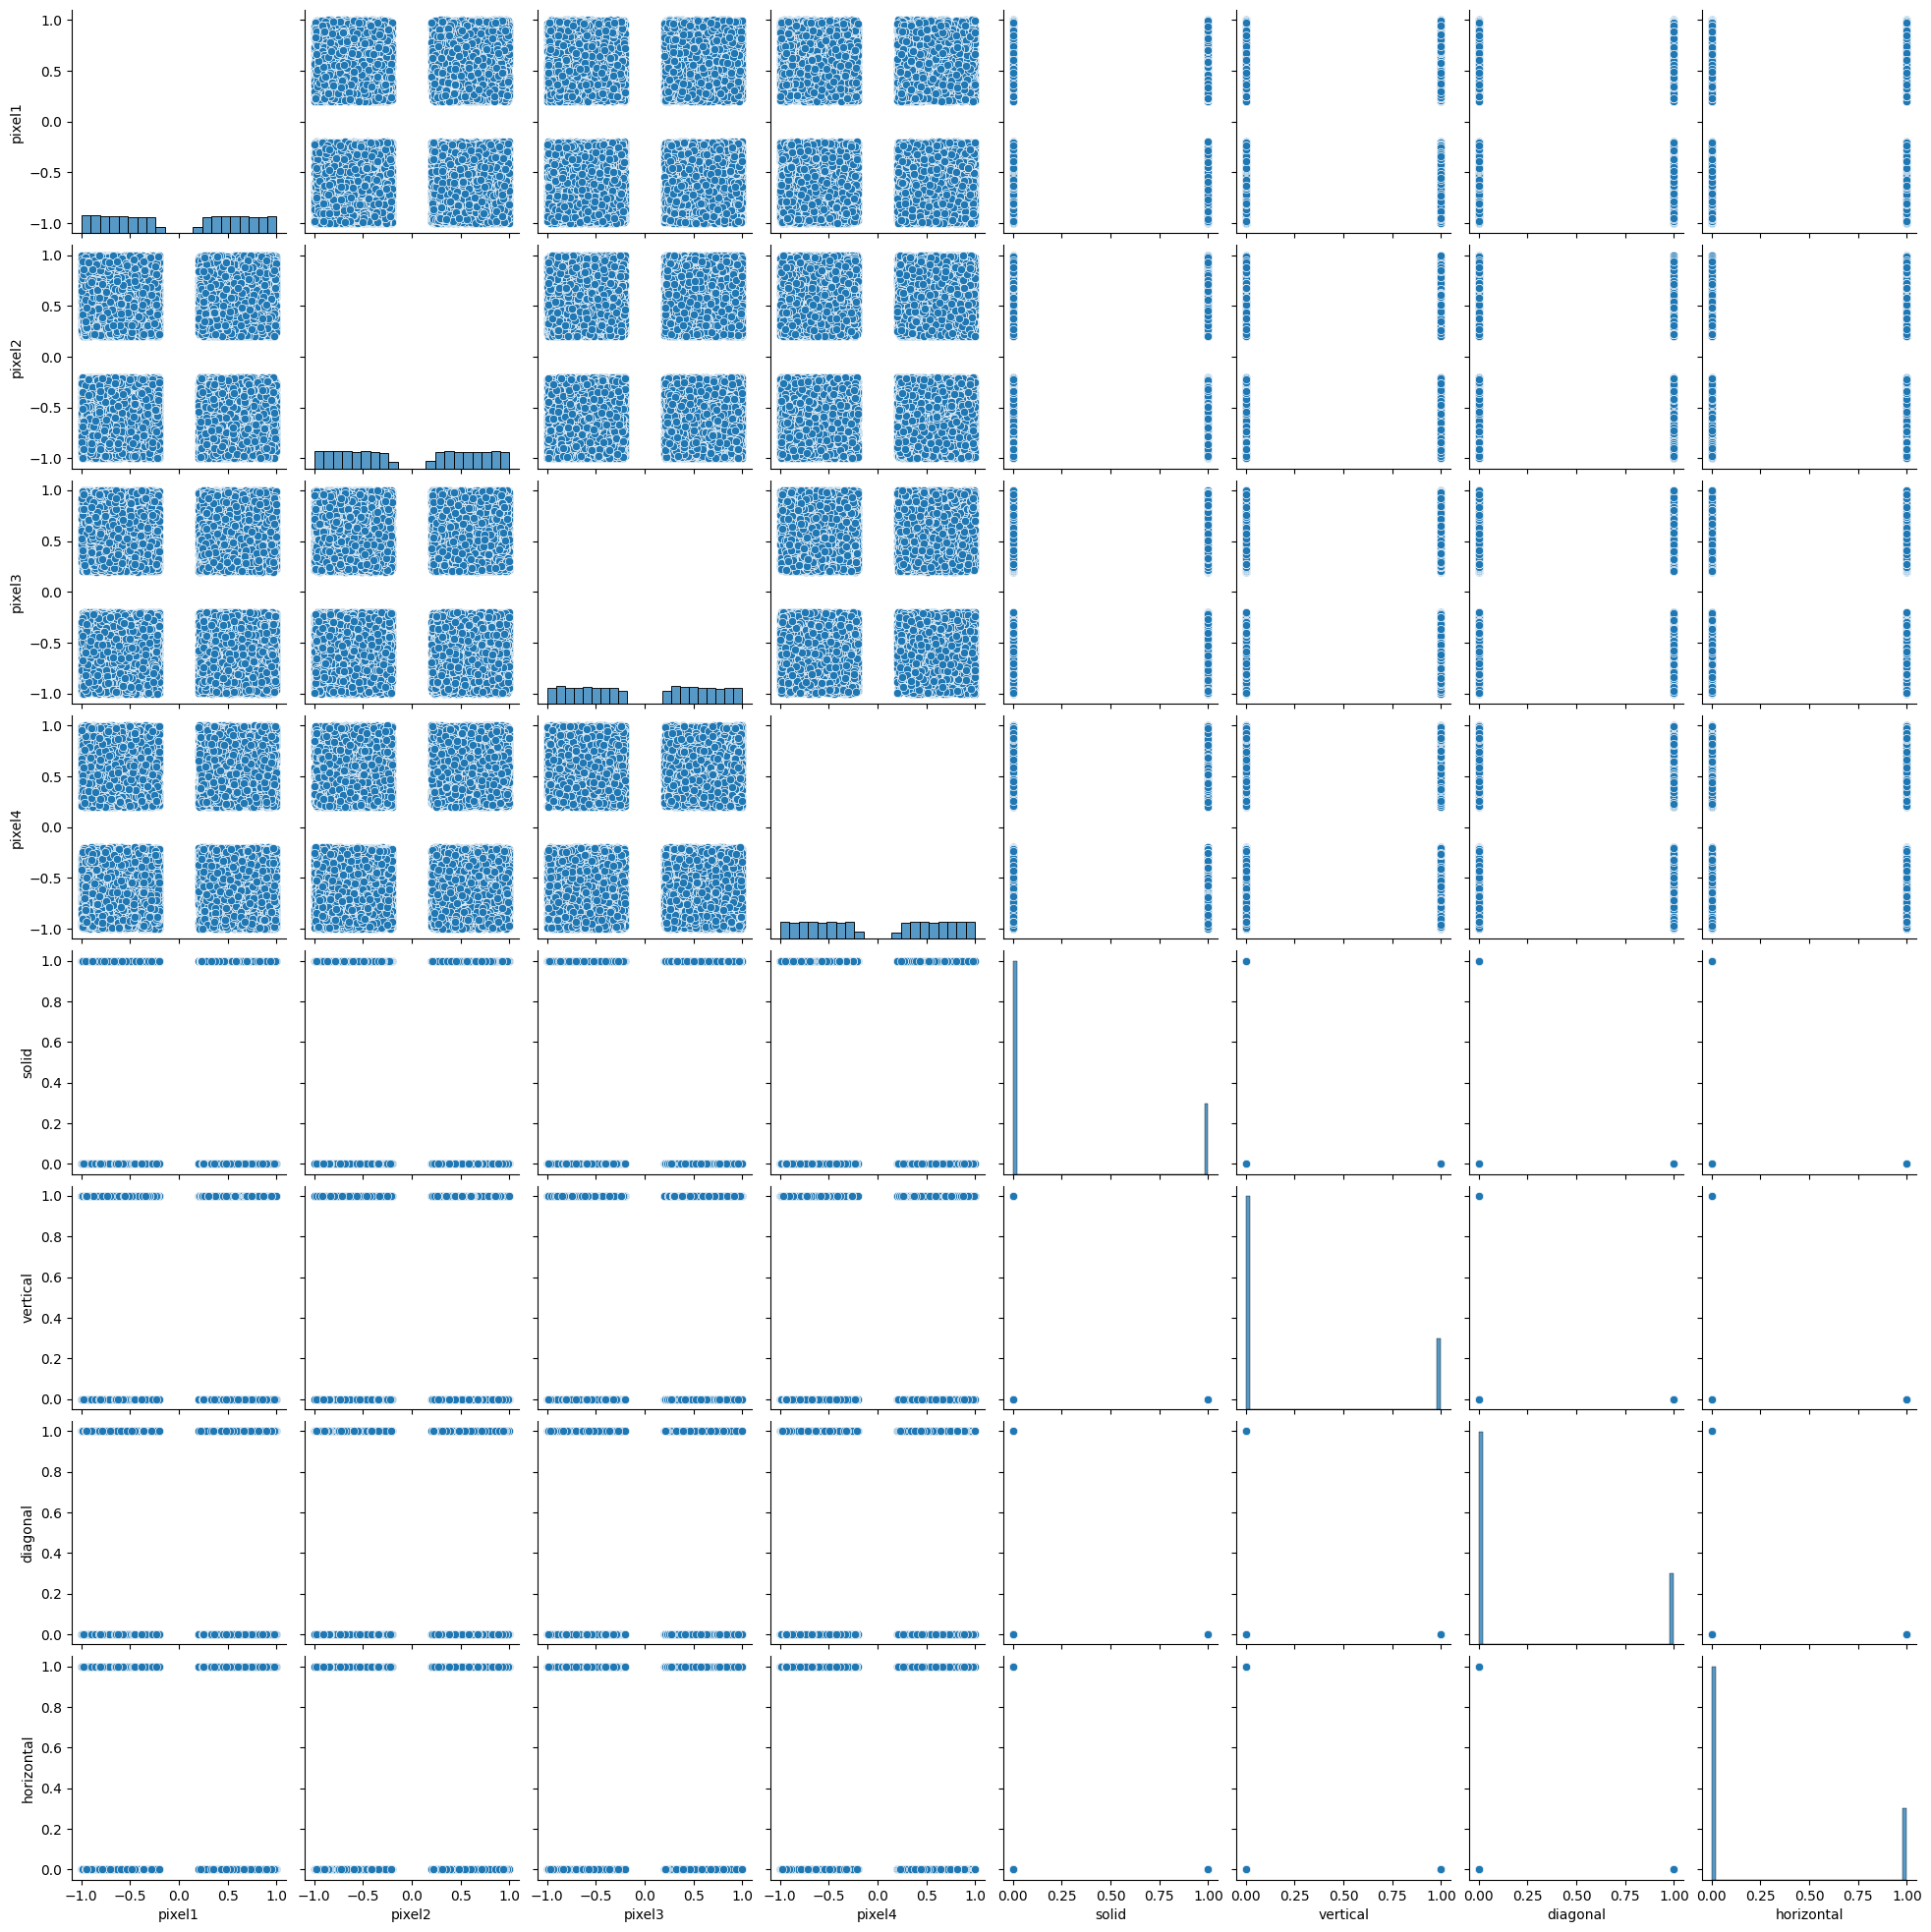

In [4]:
# Zobrazení vzorku dat
print(data.head())

# Základní statistická charakteristika
print(data.describe())

# Distribuce hodnot
sns.pairplot(data)
plt.show()

# Rozdělení dat na vstupní a výstupní (X, Y)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [6]:
# Rozdělení dat na vstupní (X) a výstupní (Y)
X = data.iloc[:, :-4].values  # První čtyři sloupce jsou vstupní pixely
Y = data.iloc[:, -4:].values  # Poslední čtyři sloupce jsou výstupní kategorie

# Rozdělení dat na trénovací, testovací a validační

In [7]:
# Rozdělení dat na trénovací, validační a testovací sadu
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)


# Neuronová síť
- Struktura
  - Vstupní vrstva
  - Skrytá vrstva - 4 neurony, aktivační funkce tanh
  - Skrytá vrstva - 4 neurony, aktivační funkce tanh
  - Skrytá vrstva - 8 neurony, aktivační funkce relu
  - Výstupní vrstva - aktivační funkce linear
- compile (optimizer="adam", loss="mse")
- summary 
- vytrénování sítě

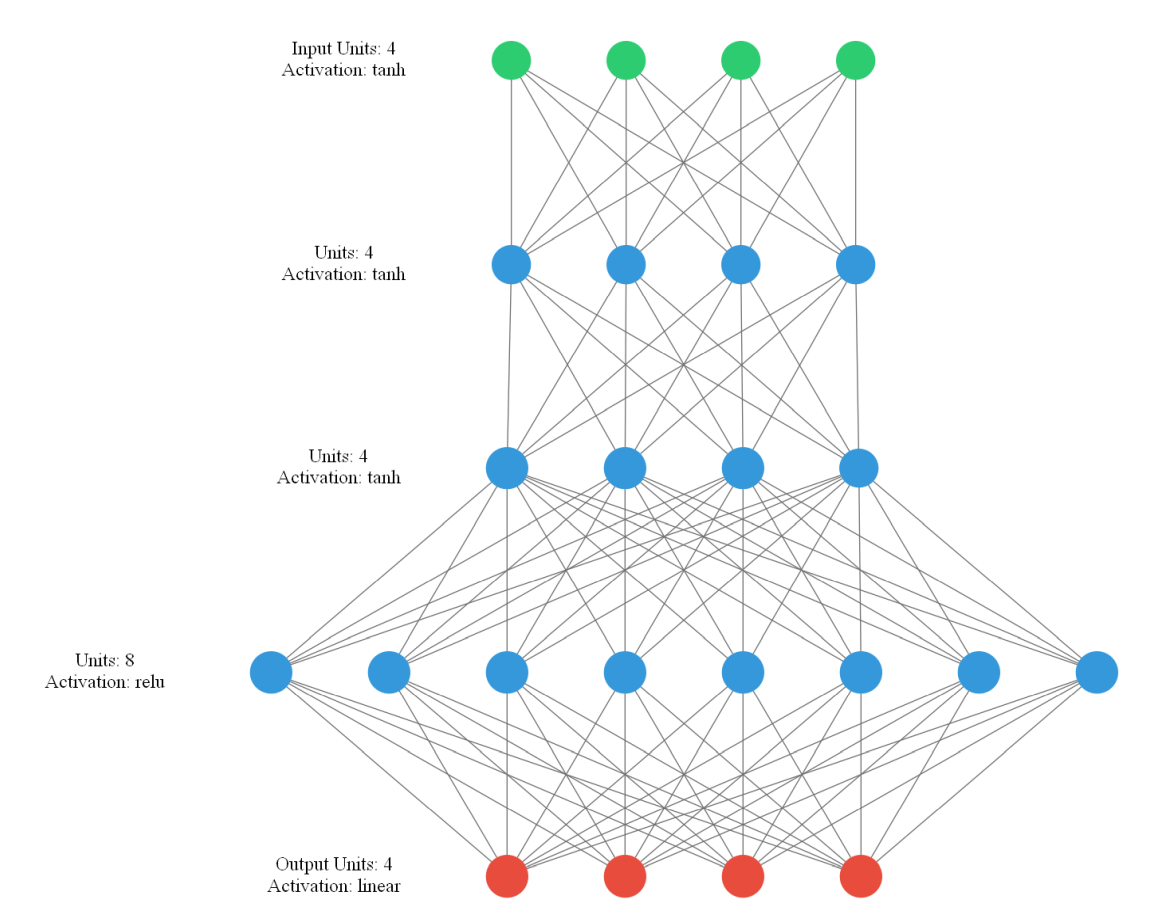

In [12]:
model = Sequential()

# Input layer (4 features: pixel1, pixel2, pixel3, pixel4)
model.add(Dense(4, input_dim=4, activation='tanh'))

# Hidden layers
model.add(Dense(4, activation='tanh'))
model.add(Dense(8, activation='relu'))

# Output layer (4 classes)
model.add(Dense(4, activation='softmax'))  # 4 output classes, softmax for classification

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [14]:
# Kompilace modelu
model.compile(optimizer='adam', loss='mse')

# Shrnutí modelu
model.summary()

# Trénování modelu
history = model.fit(X_train, Y_train, epochs=60, validation_data=(X_val, Y_val), batch_size=10, verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116 (464.00 B)

 Trainable params: 116 (464.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9867 - loss: 0.0056 - val_accuracy: 0.9883 - val_loss: 0.0050
Epoch 2/60
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9905 - loss: 0.0046 - val_accuracy: 0.9892 - val_loss: 0.0046
Epoch 3/60
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9886 - loss: 0.0047 - val_accuracy: 0.9900 - val_loss: 0.0043
Epoch 4/60
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9897 - loss: 0.0045 - val_accuracy: 0.9896 - val_loss: 0.0039
Epoch 5/60
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9906 - loss: 0.0042 - val_accuracy: 0.9917 - val_loss: 0.0035
Epoch 6/60
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9923 - loss: 0.0035 - val_accuracy: 0.9908 - val_loss: 0.0038
Epoch 7/60
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9923 - loss: 0.0034 - val_accuracy: 0.9908 - val_loss: 0.0037
Epoch 8/60
1120/1120 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9921 - loss: 0.0035 - 

# Histori učení
Zobrazení křivky historie učení

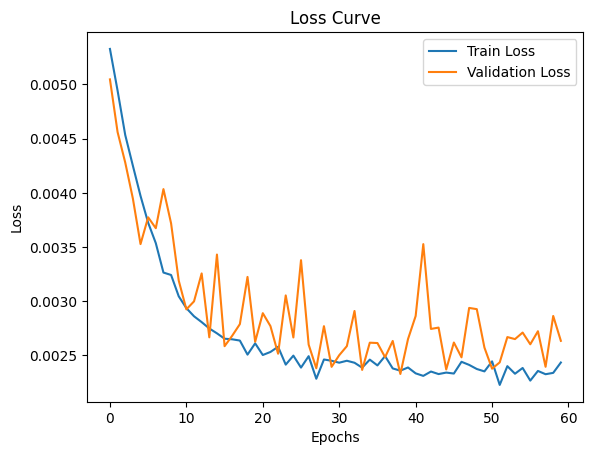

In [17]:
# Zobrazení historie učení
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()


# Výpočet přesnosti modelu R2

In [18]:
# Výpočet přesnosti modelu R2
Y_pred = model.predict(X_test)
print("R2 Score:", r2_score(Y_test, Y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R2 Score: 0.9885880947113037


# Ověření na vlastních datech

In [19]:
data = np.array([-1, 1, -1, 1])
data = data.reshape(1, -1)
Y_pred = model.predict(data)
print (Y_pred)
# Odpověď by měla být vertical např. [0, 1, 0, 0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[1.7401373e-05 9.9973315e-01 7.1918781e-05 1.7756176e-04]]
